$T = \frac{1}{2}mv^2 = \frac{1}{2}m(\dot{x}^2 + \dot{y}^2)$

In polar coordinates,

$T = \frac{1}{2}m(\dot{\rho}^2+\rho^2\dot{\phi}^2)$ 

$\rho$ is constant and $\rho = l$ so

$T = \frac{1}{2}ml^2\dot{\phi}^2$

$U = mgh = mgl(1-\cos\phi)$

and since potential is only defined up to a constant

$U = -mgl\cos\phi$

then

$L(\phi, \dot{\phi}) = \frac{1}{2}ml^2\dot{\phi}^2 + mgl\cos\phi$

Next, the EOM:

$\frac{\partial L}{\partial \dot{\phi}} = ml^2\dot{\phi}$

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} = ml^2\ddot{\phi}$

$\frac{\partial L}{\partial \phi} = -mgl\sin\phi$

With a little algebra, we get that 

$\ddot{\phi} = -\frac{g}{l}\sin\phi$

In [64]:
%matplotlib inline

In [65]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})

In [66]:
def ode_rhs_exact(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi, phidot = u_vec
    g, R = params
    return [phidot , -g/R*np.sin(phi)]

Let's try a one-dimensional first-order ODE, say:$\begin{align}
\quad 
\frac{dv}{dt} = -g, \quad \mbox{with} \quad v(0) = 10
\end{align}$in some appropriate units (we'll use MKS units by default).  This ODE can be separated and directly integrated:$\begin{align}
  \int_{v_0=10}^{v} dv' = - g \int_{0}^{t} dt'
  \quad\Longrightarrow\quad
    v - v_0 = - g (t - 0)
  \quad\Longrightarrow\quad
   v(t) = 10 - gt
\end{align}$

In [67]:
#parameters
g = 9.8 # in mks units
R = 5   # radius in meters

#absolute and relative tolerances for ode solver
abserr = 1.0e-8
relerr = 1.0e-6

#initial conditions for [phi, phidot]
phi0 = np.pi/180 * 20
u0_vec = [phi0 , 0 ]

t_max = 15. # integration time
t_pts = np.arange(0, t_max, 0.01) # array of time points, spaced 0.01

# Integrate the differential equation and read off phi, phidot (note T!)
phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g, R), atol=abserr, rtol=relerr).T

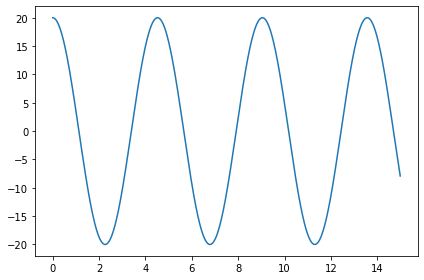

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_pts, 180./np.pi*phi)
fig.tight_layout() # make the spacing of the subplots nicer

In [69]:
def solve_for_phi(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    
    abserr = 1.0e-8
    relerr = 1.0e-6
    
    u0_vec = [phi0, phidot0]
    
    t_pts = np.arange(t_min, t_max, 0.01)
    
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g,R), atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot

In [70]:
phi0 = np.pi/180 * 20
t_pts, phi, phidot = solve_for_phi(phi0, t_max=15.)

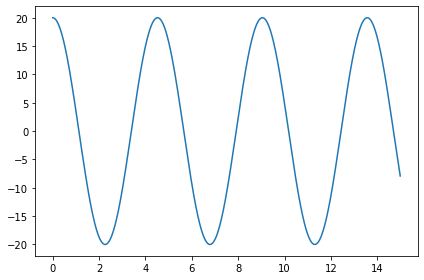

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_pts, 180./np.pi * phi)
fig.tight_layout()

Expand $\cos\phi$ using the N2LO Taylor Expansion:

$\cos\phi = 1 - \frac{\phi^2}{2} + \frac{\phi^4}{24} - \frac{\phi^6}{720}$

Then the Lagrangian becomes

$L(\phi, \dot{\phi}) = \frac{1}{2}ml^2\dot{\phi}^2 + mgl(1 - \frac{\phi^2}{2} + \frac{\phi^4}{24} - \frac{\phi^6}{720})$

Taking the necessary derivatives gives

$\frac{\partial L}{\partial \dot{\phi}} = ml^2\dot{\phi}$

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} = ml^2\ddot{\phi}$

$\frac{\partial L}{\partial \phi} = mgl(-\phi + \frac{\phi^3}{6} - \frac{\phi^5}{120})$ 

Which gives the EOM:

$\ddot{\phi} = \frac{g}{l}(-\phi + \frac{\phi^3}{6} - \frac{\phi^5}{120})$

In [72]:
def ode_rhs_lo(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi, phidot = u_vec
    g, R = params
    return [phidot , -g/R*phi]

In [73]:
def ode_rhs_nlo(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi, phidot = u_vec
    g, R = params
    return [phidot , g/R*(-phi + phi**3/6)]

In [74]:
def ode_rhs_n2lo(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi, phidot = u_vec
    g, R = params
    return [phidot , g/R*(-phi + phi**3/6 -phi**5/120)]

In [75]:
 def solve_for_phi_all(phi0, phidot0=0, t_min=0., t_max=1., g=9.8, R=5.):
    """
    Solve the EOM for the ideal pendulum using the exact equation and the 
    small-angle approximation. The results for t, \phi(t) and \dot\phi(t), 
    are returned for a grid with t_min < t < t_max and a hardwired (for now) 
    spacing of 0.01 seconds. The ODE solver is odeint from scipy, with specified 
    tolerances. Units are mks and angles are in radians.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0,0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equations
    phi, phidot = odeint(ode_rhs_exact, u0_vec, t_pts, args=(g,R), atol=abserr, rtol=relerr).T
    phi_lo, phidot_lo = odeint(ode_rhs_lo, u0_vec, t_pts, args=(g,R), atol=abserr, rtol=relerr).T
    phi_nlo, phidot_nlo = odeint(ode_rhs_nlo, u0_vec, t_pts, args=(g,R), atol=abserr, rtol=relerr).T
    phi_n2lo, phidot_n2lo = odeint(ode_rhs_n2lo, u0_vec, t_pts, args=(g,R), atol=abserr, rtol=relerr).T
    
    return t_pts, phi, phidot, phi_lo, phidot_lo, phi_nlo, phidot_nlo, phi_n2lo, phidot_n2lo

In [76]:
phi0 = np.pi/180 * 20.
t_pts, phi, phidot, phi_lo, phidot_lo, phi_nlo, phidot_nlo, phi_n2lo, phidot_n2lo = solve_for_phi_all(phi0, t_max = 15.)

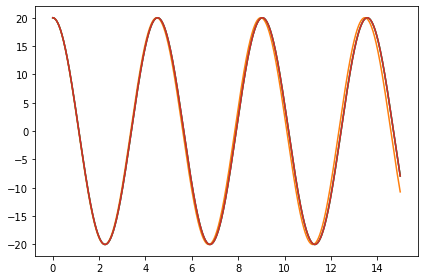

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_pts, 180./np.pi * phi)
ax.plot(t_pts, 180./np.pi * phi_lo)
ax.plot(t_pts, 180./np.pi * phi_nlo)
ax.plot(t_pts, 180./np.pi * phi_n2lo)
fig.tight_layout()  # make the spacing of subplots nicer

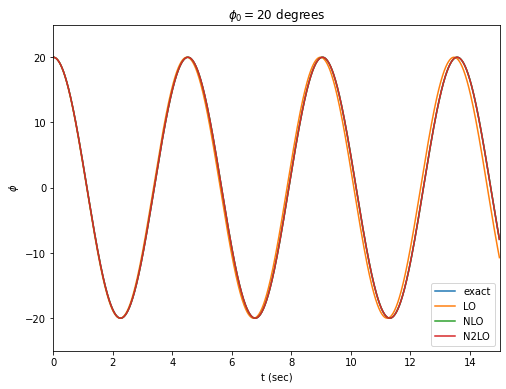

In [78]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0.,15.)
ax.set_ylim(-25.,25.)
ax.set_xlabel('t (sec)')
ax.set_ylabel(r'$\phi$')
ax.set_title(r'$\phi_0 = 20$ degrees')

# DO NOT ERASE THE COMMA AND THE EMPTY SPACE!!!! 
# ax.plot() returns *two* objects, and the empty space after the comma means we do not assign it to a named
# variable because we do not need to use it in the following.

line_exact, = ax.plot(t_pts, 180./np.pi * phi, label='exact')
line_lo, = ax.plot(t_pts, 180./np.pi * phi_lo, label='LO')
line_nlo, = ax.plot(t_pts, 180./np.pi * phi_nlo, label='NLO')
line_n2lo, = ax.plot(t_pts, 180./np.pi * phi_n2lo, label='N2LO')
ax.legend()

# save the figure
fig.savefig('p01_pendulum_solutions.png', bbox_inches='tight')

In [79]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

def rad_to_deg(theta_rad):
    """Take as input an angle in radians and return it in degrees."""
    return 180./np.pi * theta_rad

def deg_to_rad(theta_deg):
    """Take as input an angle in degrees and return it in radians."""
    return np.pi/180. * theta_deg

In [80]:
def plot_exact_and_small_angle(phi0_deg=0):
    phi0_rad = deg_to_rad(phi0_deg)
    t_pts, phi, phidot, phi_lo, phidot_lo, phi_nlo, phidot_nlo, phi_n2lo, phidot_n2lo = solve_for_phi_all(phi0_rad, t_max=15.)
    phi_deg = rad_to_deg(phi)
    phi_lo_deg = rad_to_deg(phi_lo)
    phi_nlo_deg = rad_to_deg(phi_nlo)
    phi_n2lo_deg = rad_to_deg(phi_n2lo)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    # DO NOT ERASE THE COMMA AND THE EMPTY SPACE!!!! 
    # ax.plot() returns *two* objects, and the empty space after the comma means we do not assign it to a named
    # variable because we do not need to use it in the following.
    
    line_exact, = ax.plot(t_pts, phi_deg, label='exact')
    line_lo, = ax.plot(t_pts, phi_lo_deg, label='LO')
    line_nlo, = ax.plot(t_pts, phi_nlo_deg, label='NLO')
    line_n2lo, = ax.plot(t_pts, phi_n2lo_deg, label='N2LO')
    ax.legend()
    ax.set_xlim(0.,15.)
    #ax.set_ylim(-90.,90.)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel(r'$\phi$')
    ax.set_title(fr'$\phi_0 = {phi0_deg:.0f}$')
    plt.show()

In [81]:
interact(plot_exact_and_small_angle, phi0_deg=(0., 90.));

interactive(children=(FloatSlider(value=0.0, description='phi0_deg', max=90.0), Output()), _dom_classes=('widg…

In [82]:
interactive(children=(FloatSlider(value=0.0, description='phi0_deg', max=90.0), Output()), _dom_classes=('widg…

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_0$ (degrees)', max=1…

In [ ]:
# to avoid the jiggling and do some formatting
phi0_deg_widget = widgets.FloatSlider(min=0., max=120.0, step=0.1, value=0.,
                                     description=r'$\phi_0$ (degrees)',
                                     readout_format='.0f',
                                     continuous_update=False
                                    )
interact(plot_exact_and_small_angle, phi0_deg=phi0_deg_widget);

In [ ]:
interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_0$ (degrees)', max=1…

Up to about 30 degrees, all approximations are close to identical, with the LO approximation beginning to diverge near 30 degrees. The NLO approximation doesn't begin to diverge until around 80 degrees. The N2LO stays nearly identical to the exact calculation up to 120 degrees, although I question whether additional forces/dynamics would need to be considered for such large angles or whether the pendulum bob would indeed continue to follow the circular track.

$\vec{F} = -\mu(v)\hat{v} = -\beta v$ 

$\mu(v) = \beta$

$D=\int_{0}^{v}\mu(v')dv' = \int_{0}^{v}\beta dv'$

$D = \beta v = \beta R^2 \dot{\phi}^2$

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} - \frac{\partial L}{\partial \phi} = -\frac{\partial D}{\partial \dot{\phi}}$ 

$mR\ddot{\phi} + mg\sin\phi = -2\beta R \dot{\phi}$

$\ddot{\phi} = - \frac{g}{R}\sin\phi - \frac{2\beta}{m} \dot{\phi}$

LO approximation: 

$\sin\phi = \phi$

$ml^2\ddot{\phi} + mgl\phi = 2\beta R^2 \dot{\phi}$

$\ddot{\phi} = \frac{2\beta}{m} \dot{\phi} - \frac{g}{R}\phi$

In [135]:
def ode_damped_rhs_exact(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi_d, phidot_d = u_vec
    g, R, beta, m = params
    return [phidot_d , -g/R*np.sin(phi_d) - 2*beta / m * phidot_d]

In [136]:
def ode_damped_rhs_lo(u_vec, t, *params):
    
    #(phidot)dot = -g/lsin(phi) and (phidot) = (phi)dot
    #U = (phi(t), phidot(t))
    #dU/dt = (phidot, -g/lsinphi
    #phi = U[0] phidot = U[1]
    
    phi_d, phidot_d = u_vec
    g, R, beta, m = params
    return [phidot_d , -g/R*phi_d - 2*beta / m * phidot_d]

In [137]:
 def solve_for_phi_all_d(phi0_d, phidot0_d=0, t_min=0., t_max=1., g=9.8, R=5., beta = 0.05, m = 0.5):
    """
    Solve the EOM for the ideal pendulum using the exact equation and the 
    small-angle approximation. The results for t, \phi(t) and \dot\phi(t), 
    are returned for a grid with t_min < t < t_max and a hardwired (for now) 
    spacing of 0.01 seconds. The ODE solver is odeint from scipy, with specified 
    tolerances. Units are mks and angles are in radians.
    """

    # absolute and relative tolerances for ode solver
    abserr = 1.0e-8
    relerr = 1.0e-6

    # initial conditions for [phi, phidot]
    u0_vec = [phi0_d,0]

    t_pts = np.arange(t_min, t_max, 0.01)

    # Integrate the differential equations
    phi_d, phidot_d = odeint(ode_damped_rhs_exact, u0_vec, t_pts, args=(g,R,beta,m), atol=abserr, rtol=relerr).T
    phi_d_lo, phidot_d_lo = odeint(ode_damped_rhs_lo, u0_vec, t_pts, args=(g,R,beta,m), atol=abserr, rtol=relerr).T
    
    return t_pts, phi_d, phidot_d, phi_d_lo, phidot_d_lo

In [138]:
phi0_d = np.pi/180 * 20.
t_pts, phi_d, phidot_d, phi_d_lo, phidot_d_lo = solve_for_phi_all_d(phi0_d, t_max = 15.)

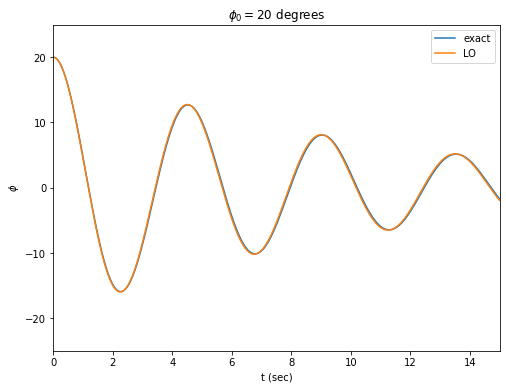

In [142]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0.,15.)
ax.set_ylim(-25.,25.)
ax.set_xlabel('t (sec)')
ax.set_ylabel(r'$\phi$')
ax.set_title(r'$\phi_0 = 20$ degrees')

# DO NOT ERASE THE COMMA AND THE EMPTY SPACE!!!! 
# ax.plot() returns *two* objects, and the empty space after the comma means we do not assign it to a named
# variable because we do not need to use it in the following.

line_d_exact, = ax.plot(t_pts, 180./np.pi * phi_d, label='exact')
line_d_lo, = ax.plot(t_pts, 180./np.pi * phi_d_lo, label='LO')
ax.legend()

# save the figure
fig.savefig('p01_damped_pendulum_solutions.png', bbox_inches='tight')

In [143]:
def plot_exact_and_small_angle_d(phi0_d_deg=0):
    phi0_d_rad = deg_to_rad(phi0_d_deg)
    t_pts, phi_d, phidot_d, phi_d_lo, phidot_d_lo = solve_for_phi_all_d(phi0_d_rad, t_max=15.)
    phi_d_deg = rad_to_deg(phi_d)
    phi_d_lo_deg = rad_to_deg(phi_d_lo)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    
    # DO NOT ERASE THE COMMA AND THE EMPTY SPACE!!!! 
    # ax.plot() returns *two* objects, and the empty space after the comma means we do not assign it to a named
    # variable because we do not need to use it in the following.
    
    line_exact, = ax.plot(t_pts, phi_d_deg, label='exact')
    line_lo, = ax.plot(t_pts, phi_d_lo_deg, label='LO')
    ax.legend()
    ax.set_xlim(0.,15.)
    #ax.set_ylim(-90.,90.)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel(r'$\phi$')
    ax.set_title(fr'$\phi_0 = {phi0_d_deg:.0f}$')
    plt.show()

In [144]:
# to avoid the jiggling and do some formatting
phi0_d_deg_widget = widgets.FloatSlider(min=0., max=120.0, step=0.1, value=0.,
                                     description=r'$\phi_0$ (degrees)',
                                     readout_format='.0f',
                                     continuous_update=False
                                    )
interact(plot_exact_and_small_angle_d, phi0_d_deg=phi0_d_deg_widget);

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_0$ (degrees)', max=1…